# Importação e Análise Inicial
1. Importe o arquivo CSV.
2. Quantas linhas tem o dataset?
3. Quantas colunas tem o dataset?
4. Quais colunas têm o tipo `object`?
5. Quais colunas têm o tipo `int64`?
6. Existe alguma coluna de outro tipo?

In [9]:
# Import necessary libraries
import pandas as pd

# 1. Importe o arquivo CSV
df = pd.read_csv('checkpoint.csv')

# 2. Quantas linhas tem o dataset?
num_rows = df.shape[0]
print(num_rows)

# 3. Quantas colunas tem o dataset?
num_columns = df.shape[1]
print(num_columns)

# 4. Quais colunas têm o tipo `object`?
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

# 5. Quais colunas têm o tipo `int64`?
int64_columns = df.select_dtypes(include=['int64']).columns.tolist()
print(int64_columns)

# 6. Existe alguma coluna de outro tipo?
other_columns = df.select_dtypes(exclude=['object', 'int64']).columns.tolist()
print(other_columns)


378661
15
['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'country']
['ID', 'backers']
['goal', 'pledged', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']


In [10]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


# Análise Estatística
7. Qual foi o total, o máximo, o mínimo do objetivo financeiro de todos os projetos?
8. Qual o total, o máximo, o mínimo e o valor que representa 25% do dinheiro levantado?
9. Qual o total, o máximo, o mínimo e o valor que representa 75% dos apoiadores dos projetos?

In [11]:
# 7. Qual foi o total, o máximo, o mínimo do objetivo financeiro de todos os projetos?
total_goal = df['goal'].sum()
max_goal = df['goal'].max()
min_goal = df['goal'].min()
print(total_goal, max_goal, min_goal)

# 8. Qual o total, o máximo, o mínimo e o valor que representa 25% do dinheiro levantado?
total_pledged = df['pledged'].sum()
max_pledged = df['pledged'].max()
min_pledged = df['pledged'].min()
percentile_25_pledged = df['pledged'].quantile(0.25)
print(total_pledged, max_pledged, min_pledged, percentile_25_pledged)

# 9. Qual o total, o máximo, o mínimo e o valor que representa 75% dos apoiadores dos projetos?
total_backers = df['backers'].sum()
max_backers = df['backers'].max()
min_backers = df['backers'].min()
percentile_75_backers = df['backers'].quantile(0.75)
print(total_backers, max_backers, min_backers, percentile_75_backers)


18584981597.969994 100000000.0 0.01
3666566639.660001 20338986.27 0.0 30.0
39993219 219382 0 56.0


# Análise de Categorias
10. Qual a `category` mais presente? E quantos valores únicos ela possui?
11. Qual a `main_category` mais presente? E quantos valores únicos ela possui?
12. Qual a `currency` mais presente? E quantos valores únicos ela possui?
13. Execute o processo de dummy na coluna `country`.

In [12]:
# 10. Qual a `category` mais presente? E quantos valores únicos ela possui?
most_common_category = df['category'].mode()[0]
unique_categories_count = df['category'].nunique()
print(most_common_category, unique_categories_count)

# 11. Qual a `main_category` mais presente? E quantos valores únicos ela possui?
most_common_main_category = df['main_category'].mode()[0]
unique_main_categories_count = df['main_category'].nunique()
print(most_common_main_category, unique_main_categories_count)

# 12. Qual a `currency` mais presente? E quantos valores únicos ela possui?
most_common_currency = df['currency'].mode()[0]
unique_currencies_count = df['currency'].nunique()
print(most_common_currency, unique_currencies_count)

# 13. Execute o processo de dummy na coluna `country`.
df_country_dummies = pd.get_dummies(df['country'], prefix='country')
# Concatenar os novos dataframes de variáveis dummy ao dataframe original
#df = pd.concat([df, df_country_dummies], axis=1)

# Remover as colunas originais de variáveis categóricas
#df.drop(['country'], axis=1, inplace=True)
df.head()



Product Design 159
Film & Video 15
USD 14


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Análise de Valores Nulos
14. Qual a quantidade de valores nulos em cada feature?
15. Qual a proporção de valores nulos por valores não nulos em cada feature?
16. (Extra) Faça o tratamento desses nulos e explique por que escolheu cada método.

In [13]:
# 14. Qual a quantidade de valores nulos em cada feature?
null_counts = df.isnull().sum()
print(null_counts)
print('\n')


ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64




In [15]:
# 15. Qual a proporção de valores nulos por valores não nulos em cada feature?
null_proportions = df.isnull().sum() / df.notnull().sum()
print(null_proportions)
proporcao_nulos_porcentagem = (null_proportions * 100).round(2)
print(proporcao_nulos_porcentagem)

ID                  0.000000
name                0.000011
category            0.000000
main_category       0.000000
currency            0.000000
deadline            0.000000
goal                0.000000
launched            0.000000
pledged             0.000000
state               0.000000
backers             0.000000
country             0.000000
usd pledged         0.010129
usd_pledged_real    0.000000
usd_goal_real       0.000000
dtype: float64
ID                  0.00
name                0.00
category            0.00
main_category       0.00
currency            0.00
deadline            0.00
goal                0.00
launched            0.00
pledged             0.00
state               0.00
backers             0.00
country             0.00
usd pledged         1.01
usd_pledged_real    0.00
usd_goal_real       0.00
dtype: float64


In [13]:
# 16. (Extra) Faça o tratamento desses nulos e explique por que escolheu cada método.
# For this example, we'll fill numeric columns with the median and object columns with the mode.
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)
df.head()

C:\Users\mpatu\AppData\Local\Temp\ipykernel_23856\1270914358.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\mpatu\AppData\Local\Temp\ipykernel_23856\1270914358.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,False,False,False,False,False,False,False,False,False,False
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,False,False,False,False,False,False,False,False,False,True
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,False,False,False,False,False,False,False,False,False,True
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,False,False,False,False,False,False,False,False,False,True
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,False,False,False,False,False,False,False,False,False,True


# Visualização Gráfica
17. Visualização Gráfica da feature `state`.

C:\Users\mpatu\AppData\Local\Temp\ipykernel_23856\1480775181.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")


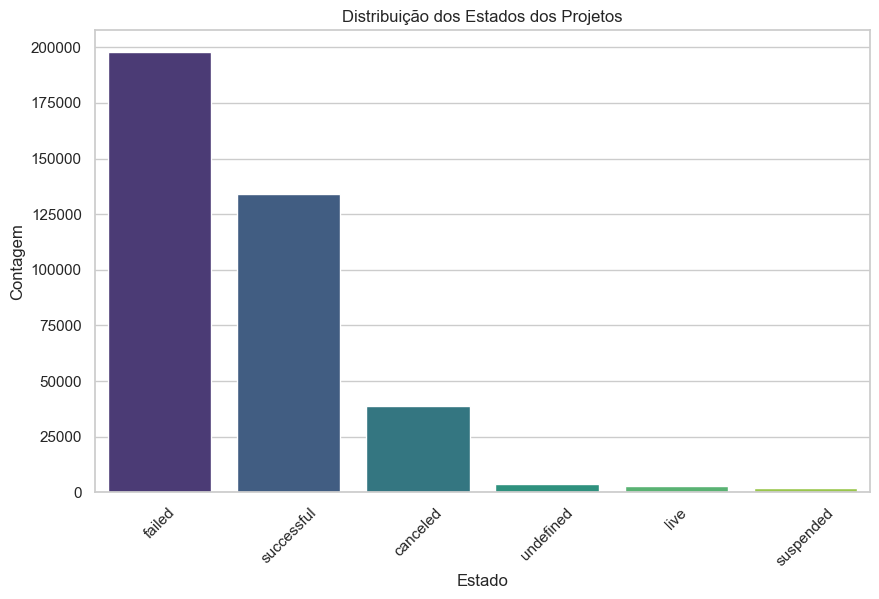

In [14]:
# 17. Visualização Gráfica da feature `state`.
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Contagem dos estados
state_counts = df['state'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
plt.title('Distribuição dos Estados dos Projetos')
plt.xlabel('Estado')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()